In [1]:
import matplotlib.pyplot as plt

In [2]:
# Defining region codes
INSIDE = 0  # 0000
LEFT = 1    # 0001
RIGHT = 2   # 0010
BOTTOM = 4  # 0100
TOP = 8     # 1000

# Set the window boundaries
X_MIN, Y_MIN = 50, 50
X_MAX, Y_MAX = 100, 100

In [3]:
# Function to compute region code for a point
def compute_code(x, y):
    code = INSIDE
    if x < X_MIN:    # to the left of rectangle
        code |= LEFT
    elif x > X_MAX:  # to the right of rectangle
        code |= RIGHT
    if y < Y_MIN:    # below the rectangle
        code |= BOTTOM
    elif y > Y_MAX:  # above the rectangle
        code |= TOP
    return code

In [5]:

def cohen_sutherland(x1, y1, x2, y2):
    code1 = compute_code(x1, y1)
    code2 = compute_code(x2, y2)

    while True:
        # If both endpoints are inside the window, accept the line
        if code1 == 0 and code2 == 0:
            return x1, y1, x2, y2

        # If both endpoints are outside the window and in the same region, reject the line
        if code1 & code2:
            return None

        # Otherwise, we need to clip the line
        # Select an endpoint that is outside the window
        if code1 != 0:
            code_out = code1
        else:
            code_out = code2

        # Find the intersection point
        if code_out & TOP:
            x = x1 + (x2 - x1) * (Y_MAX - y1) / (y2 - y1)
            y = Y_MAX
        elif code_out & BOTTOM:
            x = x1 + (x2 - x1) * (Y_MIN - y1) / (y2 - y1)
            y = Y_MIN
        elif code_out & RIGHT:
            y = y1 + (y2 - y1) * (X_MAX - x1) / (x2 - x1)
            x = X_MAX
        elif code_out & LEFT:
            y = y1 + (y2 - y1) * (X_MIN - x1) / (x2 - x1)
            x = X_MIN

        # Update the endpoint outside the window
        if code_out == code1:
            x1, y1 = x, y
            code1 = compute_code(x1, y1)
        else:
            x2, y2 = x, y
            code2 = compute_code(x2, y2)

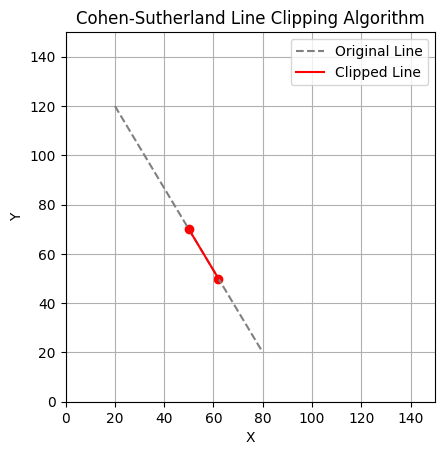

In [6]:
def main():
    x1, y1 = 20, 120   # Starting point
    x2, y2 = 80, 20    # Ending point

    plt.plot([x1, x2], [y1, y2], linestyle='dashed', color='gray', label='Original Line')

    clipped_line = cohen_sutherland(x1, y1, x2, y2)
    if clipped_line:
        x1, y1, x2, y2 = clipped_line
        plt.plot([x1, x2], [y1, y2], color='red', label='Clipped Line')
        plt.scatter([x1, x2], [y1, y2], color='red')

    plt.xlim(0, 150)
    plt.ylim(0, 150)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Cohen-Sutherland Line Clipping Algorithm')
    plt.legend()
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

if __name__ == "__main__":
    main()